In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df = pd.read_csv('vacation.csv', index_col = 'Month', parse_dates = True)
df.index.freq = 'MS'
df

,Num_Search_Vacation
Month,
2004-01-01,94
2004-02-01,89
2004-03-01,86
2004-04-01,79
2004-05-01,89
...,...
2019-06-01,58
2019-07-01,56
2019-08-01,45


<AxesSubplot:xlabel='Month'>

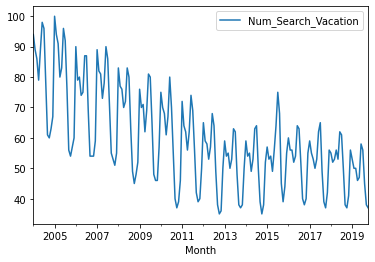

In [3]:
df.plot()

In [4]:
df1 = df.diff().dropna()

<AxesSubplot:xlabel='Month'>

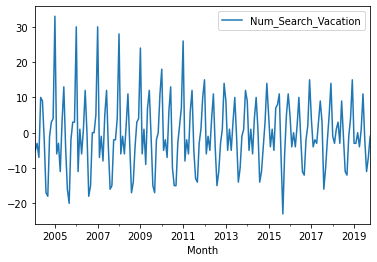

In [5]:
df1.plot()

In [6]:
for i in range(12, 0, -1):
    print(i)
    df1['t- ' + str(i)] = df1['Num_Search_Vacation'].shift(i)

12
11
10
9
8
7
6
5
4
3
2
1


In [7]:
df1

,Num_Search_Vacation,t- 12,t- 11,t- 10,t- 9,t- 8,t- 7,t- 6,t- 5,t- 4,t- 3,t- 2,t- 1
Month,,,,,,,,,,,,,
2004-02-01,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-03-01,-3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0
2004-04-01,-7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,-3.0
2004-05-01,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,-3.0,-7.0
2004-06-01,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,-3.0,-7.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-01,11.0,9.0,-1.0,-11.0,-12.0,-1.0,4.0,15.0,-3.0,-3.0,0.0,-4.0,1.0
2019-07-01,-2.0,-1.0,-11.0,-12.0,-1.0,4.0,15.0,-3.0,-3.0,0.0,-4.0,1.0,11.0
2019-08-01,-11.0,-11.0,-12.0,-1.0,4.0,15.0,-3.0,-3.0,0.0,-4.0,1.0,11.0,-2.0


In [8]:
df1.dropna(inplace = True)

In [9]:
df1

,Num_Search_Vacation,t- 12,t- 11,t- 10,t- 9,t- 8,t- 7,t- 6,t- 5,t- 4,t- 3,t- 2,t- 1
Month,,,,,,,,,,,,,
2005-02-01,-6.0,-5.0,-3.0,-7.0,10.0,9.0,-2.0,-17.0,-18.0,-1.0,3.0,4.0,33.0
2005-03-01,-3.0,-3.0,-7.0,10.0,9.0,-2.0,-17.0,-18.0,-1.0,3.0,4.0,33.0,-6.0
2005-04-01,-11.0,-7.0,10.0,9.0,-2.0,-17.0,-18.0,-1.0,3.0,4.0,33.0,-6.0,-3.0
2005-05-01,3.0,10.0,9.0,-2.0,-17.0,-18.0,-1.0,3.0,4.0,33.0,-6.0,-3.0,-11.0
2005-06-01,13.0,9.0,-2.0,-17.0,-18.0,-1.0,3.0,4.0,33.0,-6.0,-3.0,-11.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-01,11.0,9.0,-1.0,-11.0,-12.0,-1.0,4.0,15.0,-3.0,-3.0,0.0,-4.0,1.0
2019-07-01,-2.0,-1.0,-11.0,-12.0,-1.0,4.0,15.0,-3.0,-3.0,0.0,-4.0,1.0,11.0
2019-08-01,-11.0,-11.0,-12.0,-1.0,4.0,15.0,-3.0,-3.0,0.0,-4.0,1.0,11.0,-2.0


In [10]:
X = df1.iloc[:, 1:].values
X


array([[ -5.,  -3.,  -7., ...,   3.,   4.,  33.],
       [ -3.,  -7.,  10., ...,   4.,  33.,  -6.],
       [ -7.,  10.,   9., ...,  33.,  -6.,  -3.],
       ...,
       [-11., -12.,  -1., ...,   1.,  11.,  -2.],
       [-12.,  -1.,   4., ...,  11.,  -2., -11.],
       [ -1.,   4.,  15., ...,  -2., -11.,  -7.]])

In [11]:
Y = df1.iloc[:, 0].values

In [12]:
Y

array([ -6.,  -3., -11.,   3.,  13.,  -4., -16., -20.,  -2.,   3.,   3.,
        30., -11.,   1.,  -6.,   1.,  12.,   0., -18., -15.,   0.,   0.,
         5.,  30.,  -7.,  -1.,  -8.,   5.,  12.,  -4., -16., -15.,  -2.,
        -2.,   4.,  28.,  -6.,  -1.,  -6.,   2.,  11.,  -3., -17., -14.,
        -4.,   3.,   4.,  24.,  -6.,   1.,  -9.,   7.,  12.,  -1., -15.,
       -17.,  -2.,   0.,  11.,  18.,  -5.,  -2.,  -7.,   6.,  13., -10.,
       -15., -15.,  -3.,   2.,   7.,  26.,  -8.,  -2.,  -6.,   6.,  12.,
        -5., -13., -14.,  -3.,   1.,  10.,  15.,  -6.,  -1.,  -5.,   4.,
        11.,  -4., -15., -11.,  -3.,   1.,  14.,   9.,  -5.,   1.,  -5.,
         3.,  10.,  -1., -14., -10.,  -1.,   1.,  12.,   9.,  -5.,   1.,
        -6.,   4.,  10.,   1., -14., -11.,  -4.,   3.,  14.,   5.,  -4.,
         1.,  -5.,   7.,   8.,  11.,  -7., -23.,  -6.,   5.,  11.,   5.,
        -4.,   0.,  -4.,   2.,  10.,  -1., -11., -12.,  -2.,   2.,  15.,
         4.,  -4.,  -2.,  -3.,   3.,   9.,   3., -1

In [13]:
nSplit = int(len(X) * 0.80)
nSplit

141

In [14]:
Ytrain, Ytest = Y[0:nSplit], Y[nSplit:]
Xtrain, Xtest = X[0:nSplit, :],X[nSplit:, :]

### Start of lecture, random forest model

In [16]:
rfr = RandomForestRegressor(n_estimators = 200)
rfr.fit(Xtrain, Ytrain)

RandomForestRegressor(n_estimators=200)

In [17]:
print(rfr.score(Xtrain, Ytrain))
print(rfr.score(Xtest, Ytest))

0.9836026706265216
0.7051831637642869


In [18]:
train_prediction = rfr.predict(Xtrain)
test_prediction = rfr.predict(Xtest)

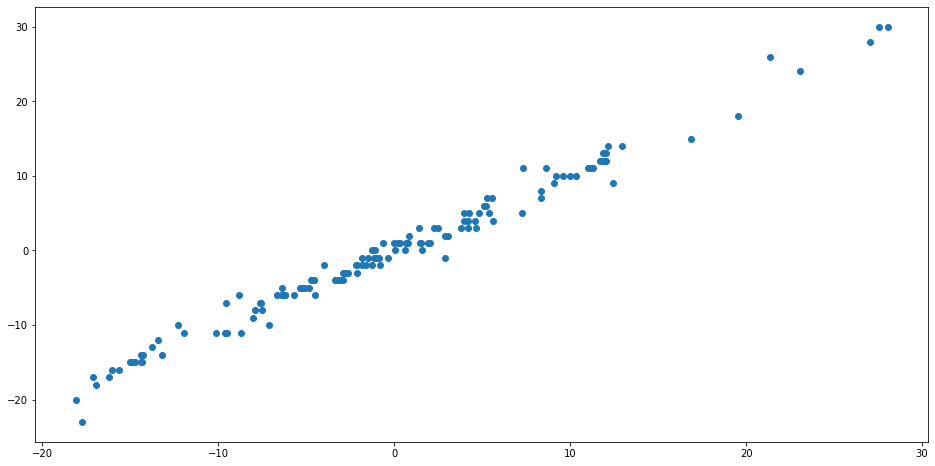

In [21]:
plt.rc("figure", figsize = (16, 8))
plt.scatter(train_prediction, Ytrain);

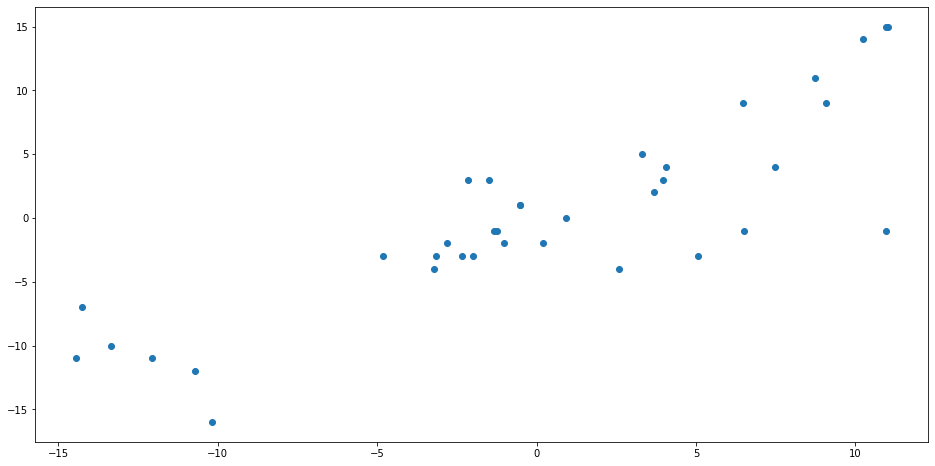

In [22]:
plt.scatter(test_prediction, Ytest);

### Grid search

In [25]:
grid = {'n_estimators' : [200], 'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'random_state': [17, 18, 19]}

In [26]:
rfr = RandomForestRegressor()
test_scores = []
for g in ParameterGrid(grid):
    rfr.set_params(**g) #unpacking parameters from dictionary
    rfr.fit(Xtrain, Ytrain) #fitting data
    test_scores.append(rfr.score(Xtest, Ytest)) #getting score

### Looking for best model

In [28]:
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

0.7823500236874135 {'random_state': 19, 'n_estimators': 200, 'max_features': 4, 'max_depth': 10}


In [31]:
rfr = RandomForestRegressor(random_state = 19, n_estimators = 200, max_features = 4, max_depth = 10)
rfr.fit(Xtrain, Ytrain)
print(rfr.score(Xtrain, Ytrain))
print(rfr.score(Xtest, Ytest))

0.9858032579818985
0.7823500236874135


### Finding out which features (lags) are the most important sicne we're only using 4

In [40]:
feature_importanceRFR = rfr.feature_importances_
sorted_index = np.argsort(feature_importanceRFR)[::-1] #sorting the index by descending order
x1 = range(len(feature_importanceRFR))
feature_names = df1.columns.tolist()[1:] #names are the same as names of collumns
labels = np.array(feature_names)[sorted_index]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 't- 12'),
  Text(1, 0, 't- 3'),
  Text(2, 0, 't- 9'),
  Text(3, 0, 't- 4'),
  Text(4, 0, 't- 7'),
  Text(5, 0, 't- 8'),
  Text(6, 0, 't- 1'),
  Text(7, 0, 't- 5'),
  Text(8, 0, 't- 6'),
  Text(9, 0, 't- 10'),
  Text(10, 0, 't- 11'),
  Text(11, 0, 't- 2')])

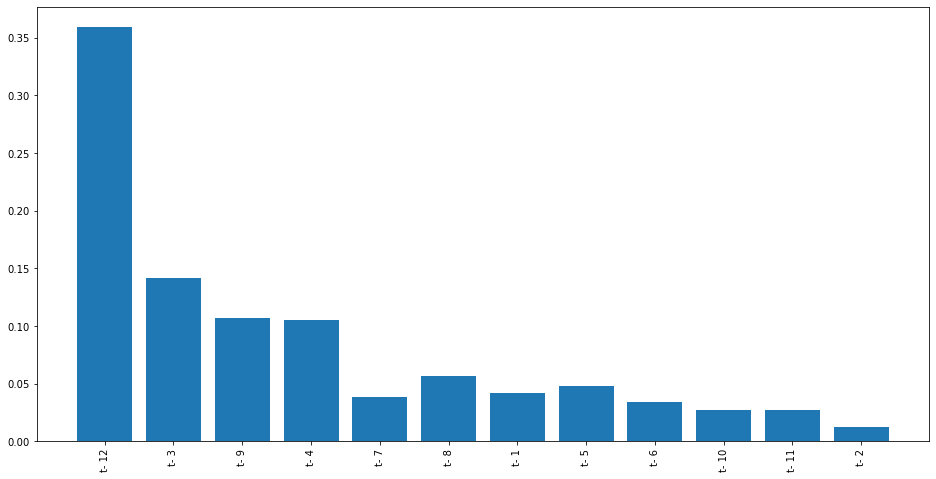

In [48]:
plt.bar(x1, feature_importanceRFR[sorted_index], tick_label = labels)
plt.xticks(rotation = 90)

### Gradient boosted regressor

In [46]:
gbr = GradientBoostingRegressor(max_features = 4, learning_rate = 0.01, n_estimators = 500, subsample = 0.6, random_state = 99)
gbr.fit(Xtrain, Ytrain)
print(gbr.score(Xtrain, Ytrain))
print(gbr.score(Xtest, Ytest))

0.9780890646152113
0.7863854000786603


In [54]:
feature_importanceGBR = gbr.feature_importances_
sorted_index = np.argsort(feature_importanceGBR)[::-1] #sorting the index by descending order
x1 = range(len(feature_importanceGBR))
feature_names = df1.columns.tolist()[1:] #names are the same as names of collumns
labels = np.array(feature_names)[sorted_index]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 't- 12'),
  Text(1, 0, 't- 3'),
  Text(2, 0, 't- 9'),
  Text(3, 0, 't- 4'),
  Text(4, 0, 't- 7'),
  Text(5, 0, 't- 8'),
  Text(6, 0, 't- 1'),
  Text(7, 0, 't- 5'),
  Text(8, 0, 't- 6'),
  Text(9, 0, 't- 10'),
  Text(10, 0, 't- 11'),
  Text(11, 0, 't- 2')])

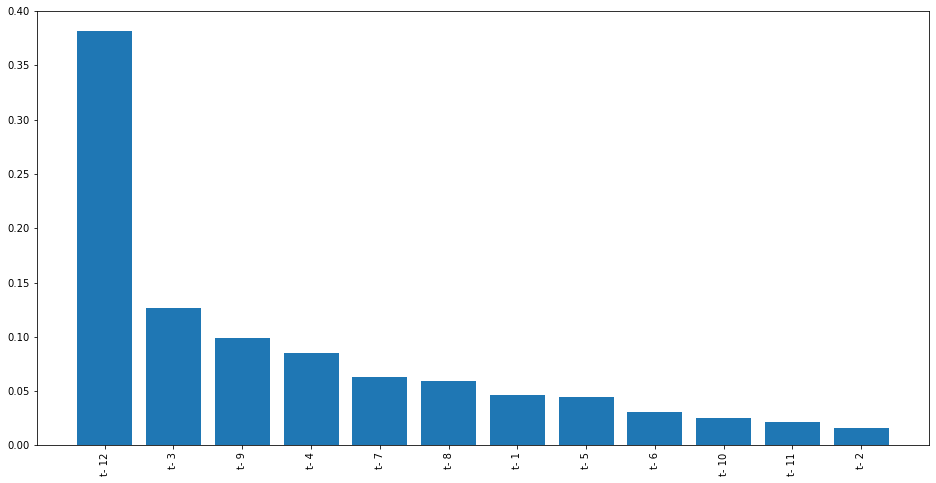

In [55]:
plt.bar(x1, feature_importanceGBR[sorted_index], tick_label = labels)
plt.xticks(rotation = 90)